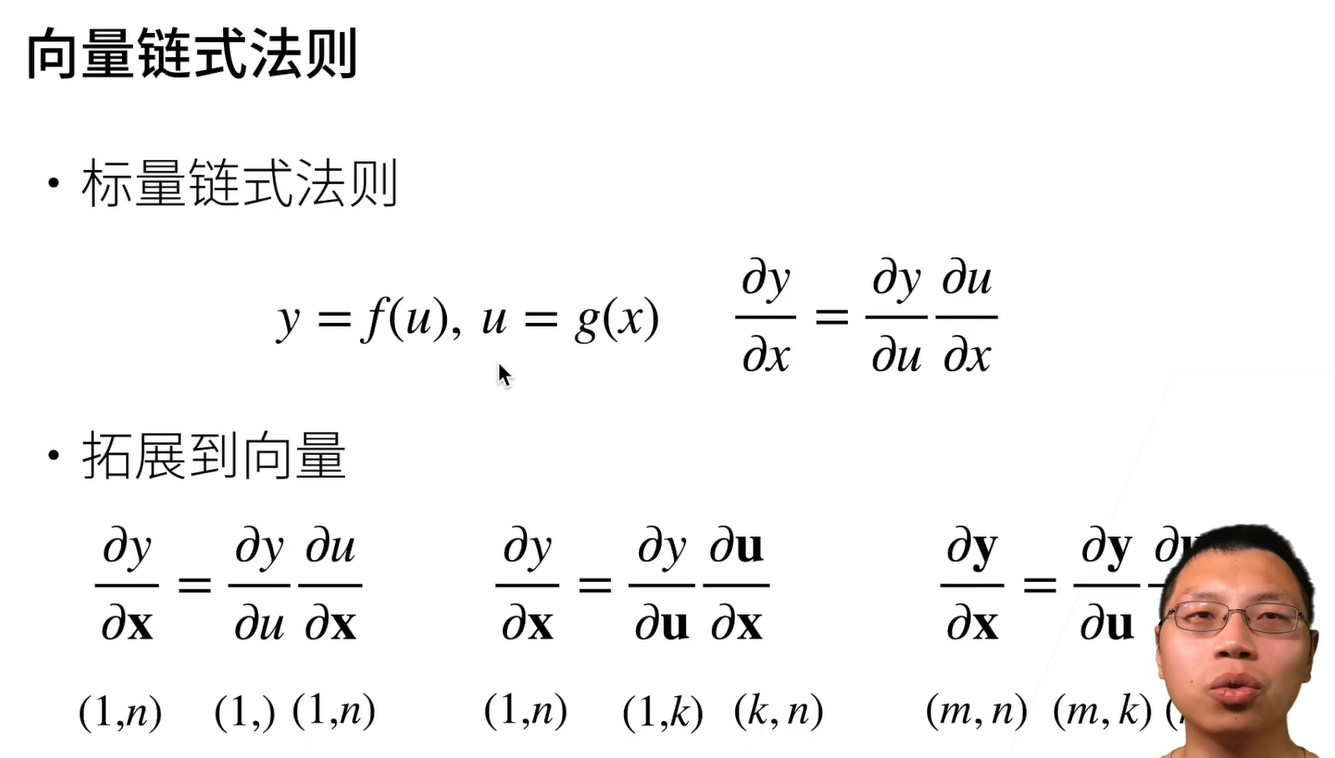

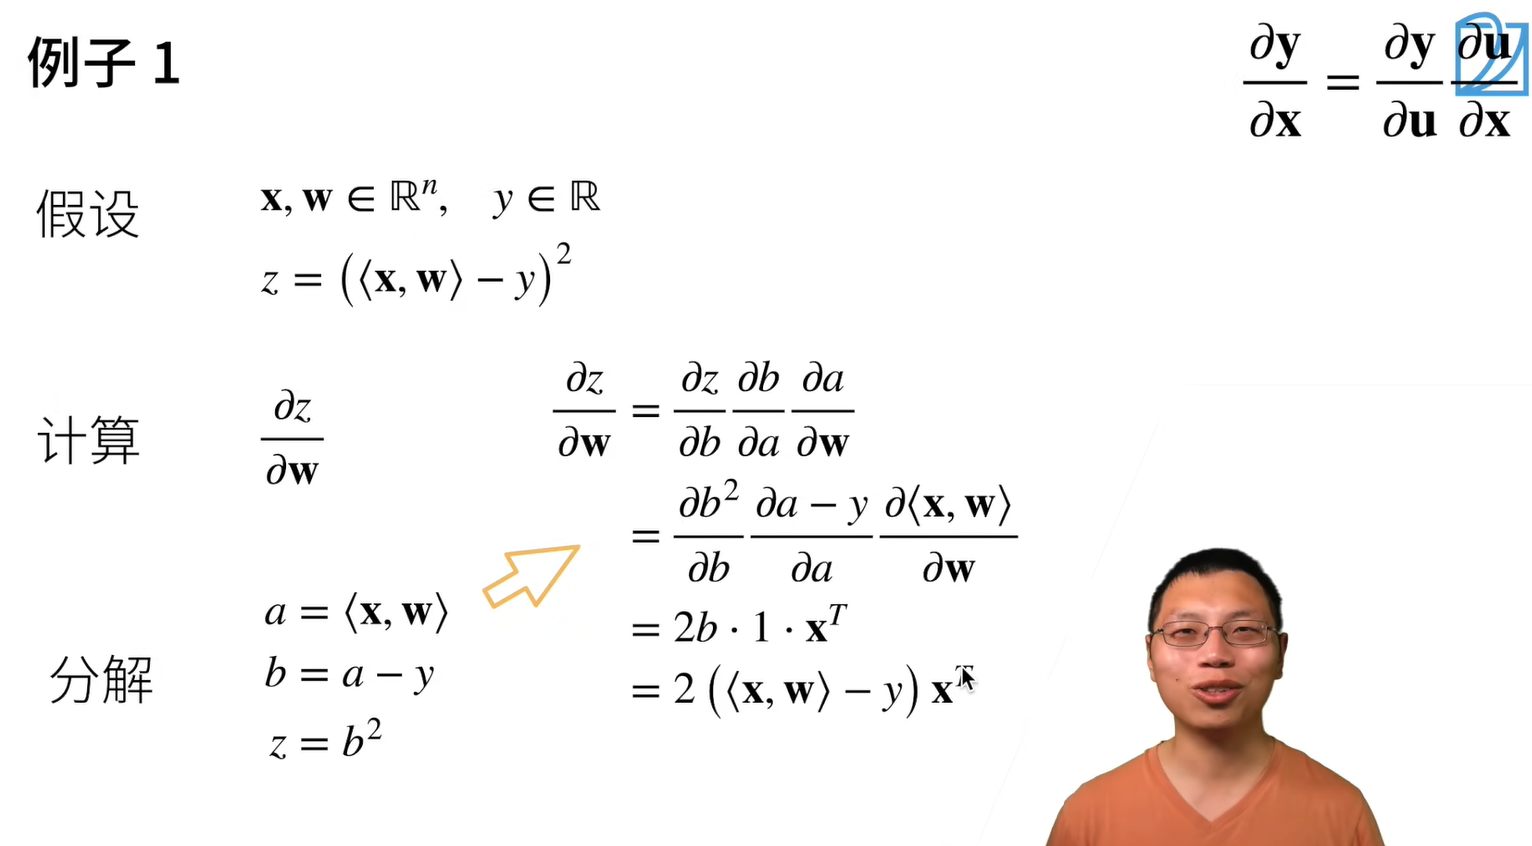

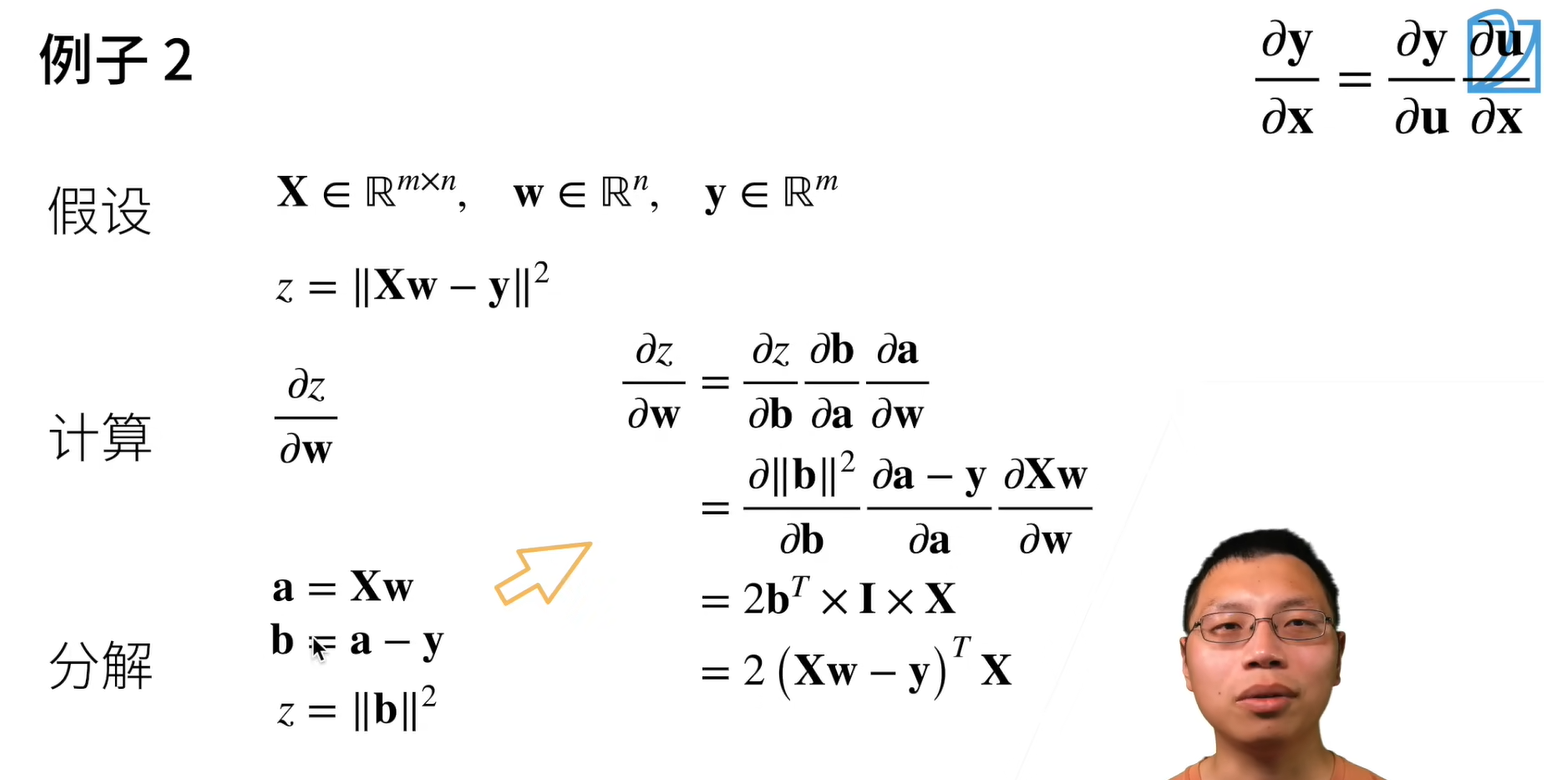

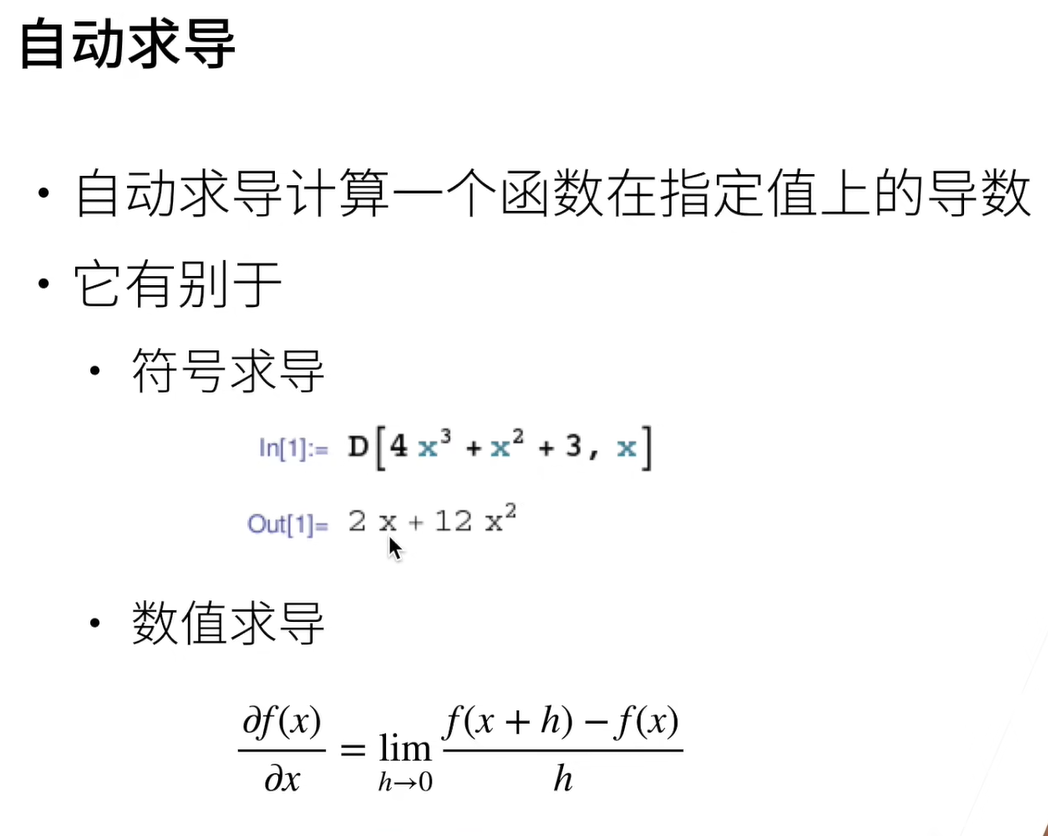

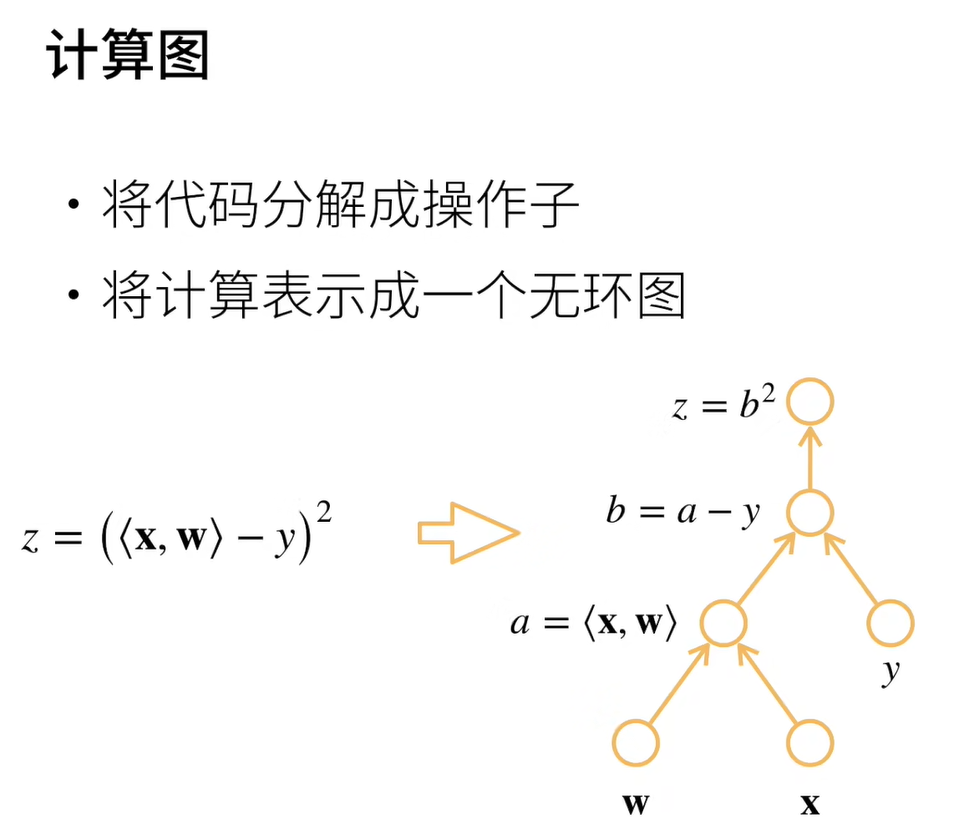

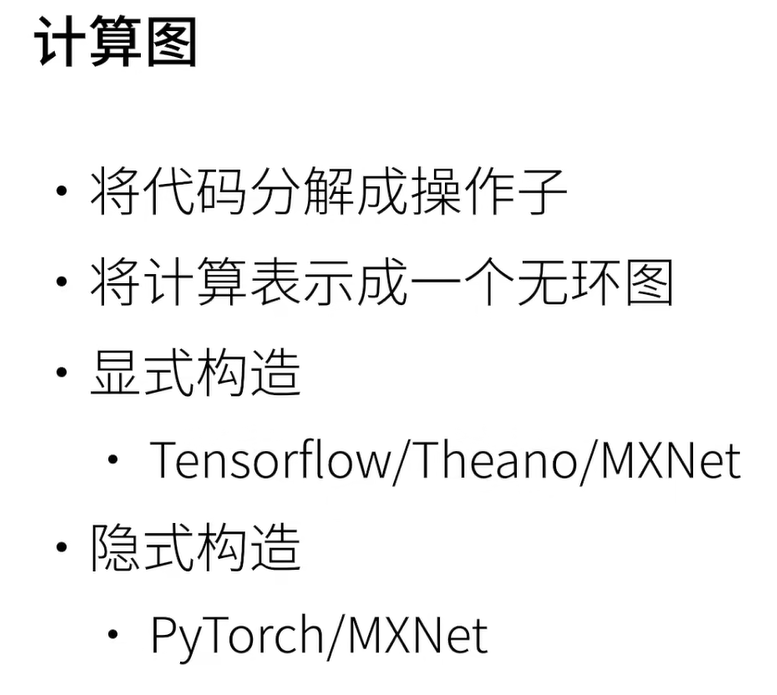

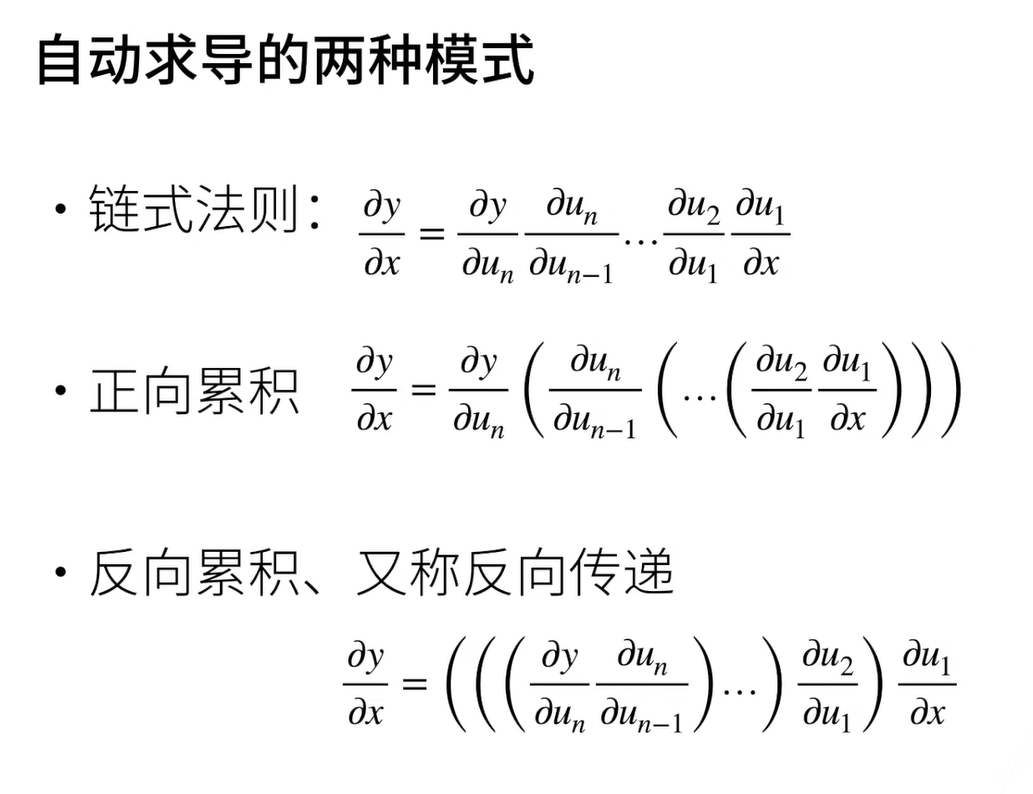

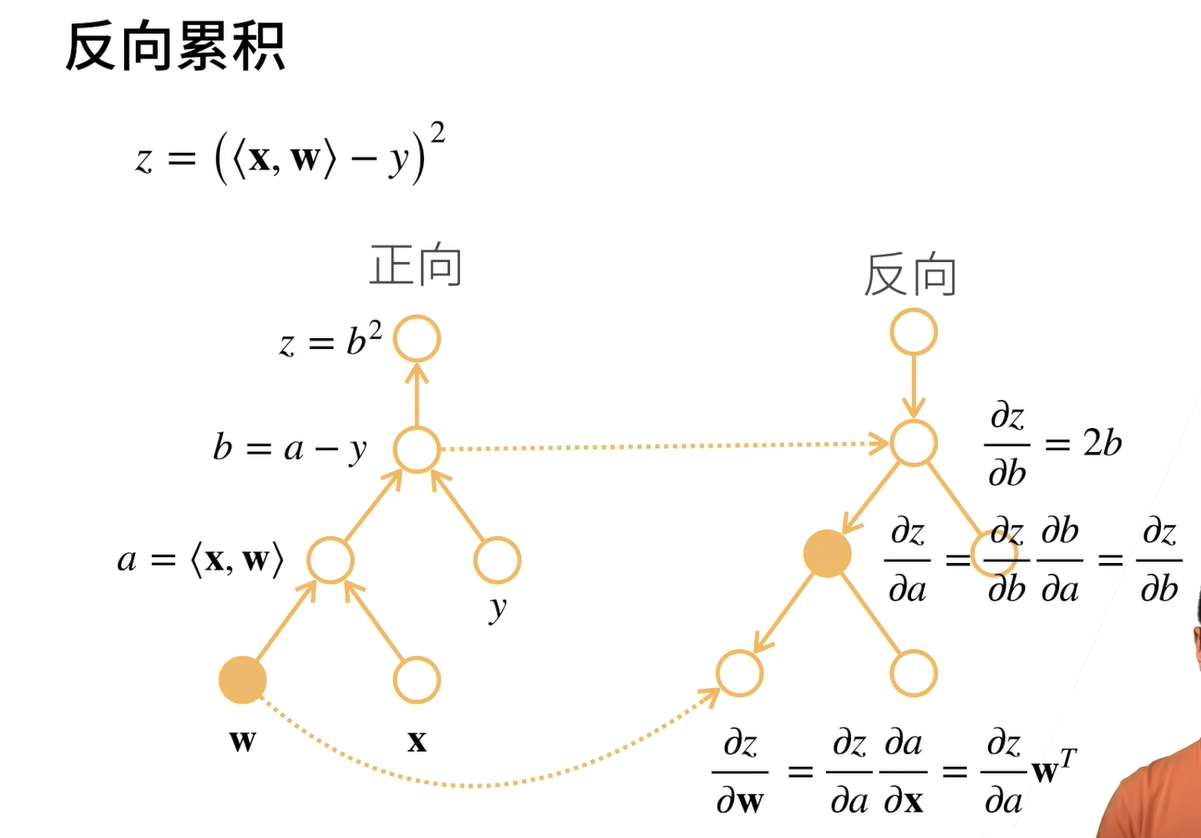

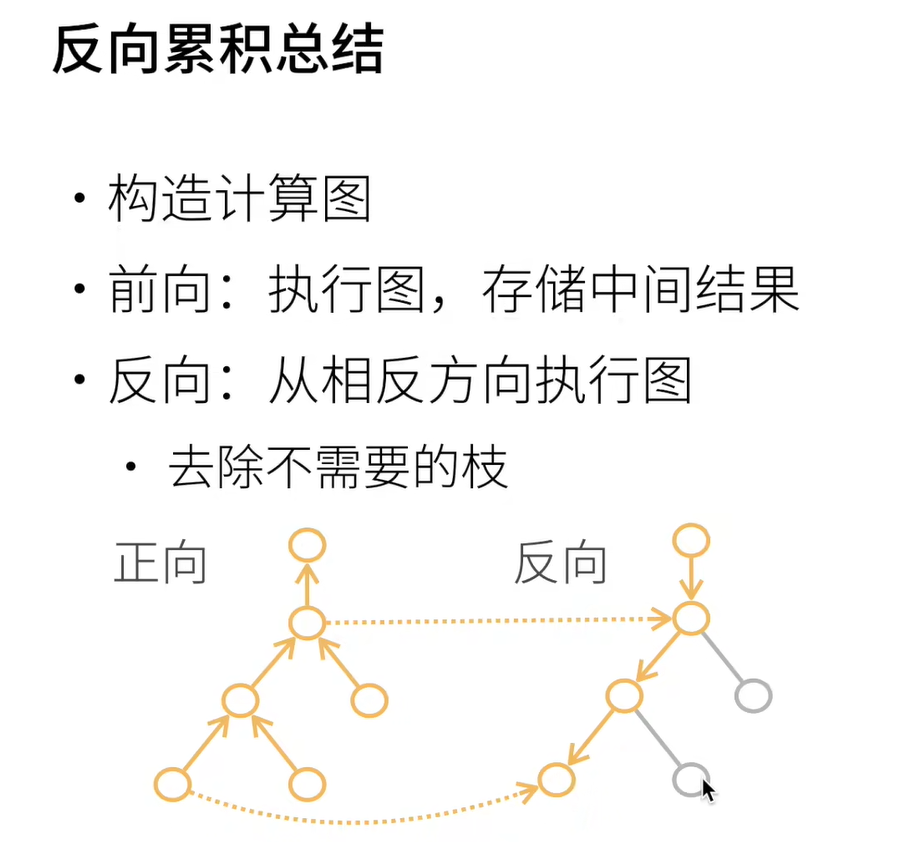

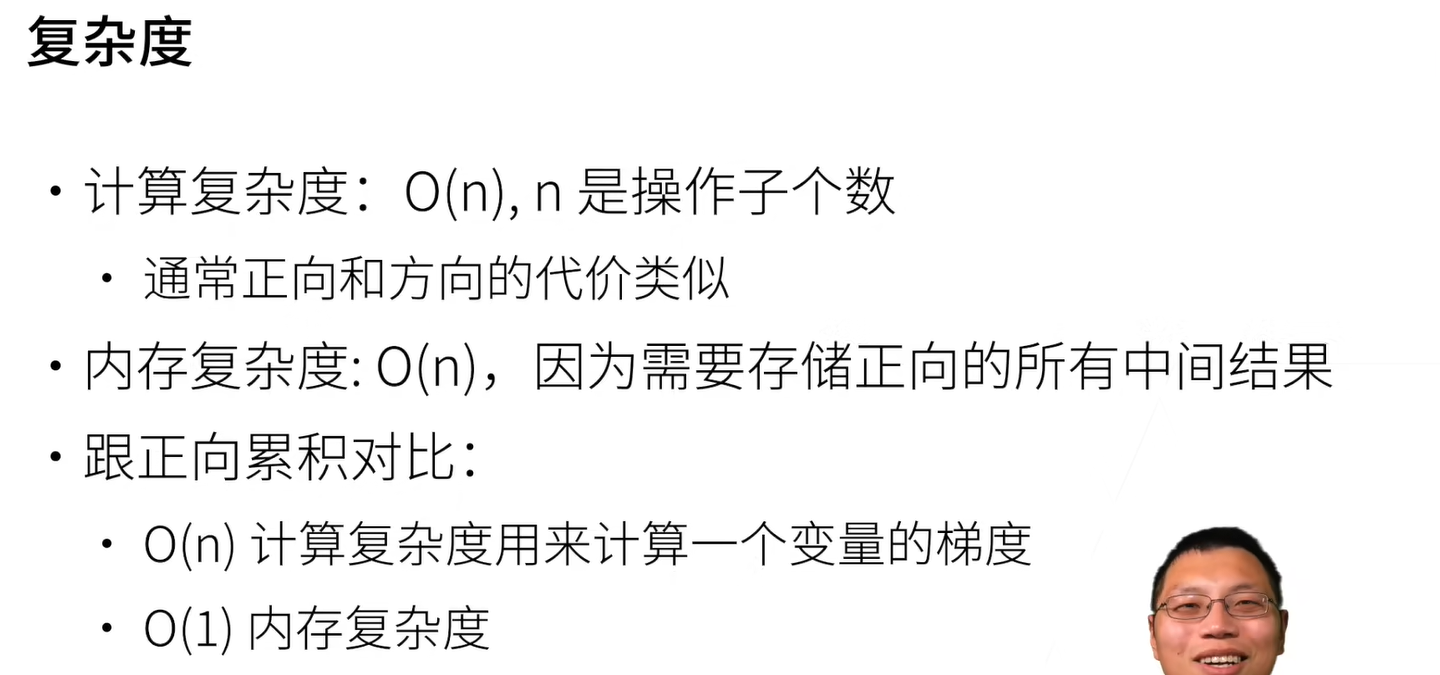

In [2]:
import torch

print('1.自动梯度计算')
x = torch.arange(4.0, requires_grad=True)  # 1.将梯度附加到想要对其计算偏导数的变量
print('x:', x)
print('x.grad:', x.grad)

1.自动梯度计算
x: tensor([0., 1., 2., 3.], requires_grad=True)
x.grad: None


In [3]:
y = 2 * torch.dot(x, x)  # 2.记录目标值的计算
print('y:', y)

y: tensor(28., grad_fn=<MulBackward0>)


In [4]:
y.backward()  # 3.执行它的反向传播函数
print('x.grad:', x.grad)  # 4.访问得到的梯度
print('x.grad == 4*x:', x.grad == 4 * x)

x.grad: tensor([ 0.,  4.,  8., 12.])
x.grad == 4*x: tensor([True, True, True, True])


In [5]:
## 计算另一个函数
x.grad.zero_()
y = x.sum()
print('y:', y)
y.backward()
print('x.grad:', x.grad)

y: tensor(6., grad_fn=<SumBackward0>)
x.grad: tensor([1., 1., 1., 1.])


In [6]:
# 非标量变量的反向传播
x.grad.zero_()
print('x:', x)
y = x * x
y.sum().backward()
print('x.grad:', x.grad)

x: tensor([0., 1., 2., 3.], requires_grad=True)
x.grad: tensor([0., 2., 4., 6.])


In [7]:
def f(a):
    b = a * 2
    print(b.norm())
    while b.norm() < 1000:  # 求L2范数：元素平方和的平方根
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [8]:
print('2.Python控制流的梯度计算')
a = torch.tensor(2.0)  # 初始化变量
a.requires_grad_(True)  # 1.将梯度赋给想要对其求偏导数的变量
print('a:', a)
d = f(a)  # 2.记录目标函数
print('d:', d)
d.backward()  # 3.执行目标函数的反向传播函数
print('a.grad:', a.grad)  # 4.获取梯度

2.Python控制流的梯度计算
a: tensor(2., requires_grad=True)
tensor(4., grad_fn=<CopyBackwards>)
d: tensor(1024., grad_fn=<MulBackward0>)
a.grad: tensor(512.)
